<a href="https://colab.research.google.com/github/GyanendraChaubey/Classifying-Personal-Income/blob/master/Project_Classifying_Personal_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Classifying Personal Income

In [ ]:
#importing Necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Import data
data=pd.read_csv("/content/drive/MyDrive/income.csv")

In [ ]:
#Creating a copy of the data
data=data.copy()

##Exploratory Data Analysis
1. Getting to know the data
2. Data preprocessing (Missing Values)
3. Cross tables for data visualization

In [ ]:
#Checking for the variable/columns data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
#Checking for null/missing values
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [ ]:
data.describe()

NameError: ignored

In [ ]:
data.head()

NameError: ignored

In [ ]:
#Frequency of values in JobType
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [ ]:
#Frequency of values in Occupation
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

We have found that there are "?" in the data. Hence we will move back and include "na_values=['?']" in reading of data

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/income.csv",na_values=[' ?'])

In [ ]:
data=data.copy()

NameError: ignored

In [ ]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [ ]:
missing=data[data.isnull().any(axis=1)]

In [ ]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [ ]:
data2=data.dropna(axis=0)

In [ ]:
data2.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
#Relation between independent variables
data2.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [ ]:
#Gender Proportion Table
pd.crosstab(index=data2['gender'],columns='count',normalize=True)

col_0,count
gender,
Female,0.324315
Male,0.675685


In [ ]:
#Gender vs SalaryStatus
pd.crosstab(index=data2['gender'],columns=data2['SalStat'],margins=True,normalize='index')

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


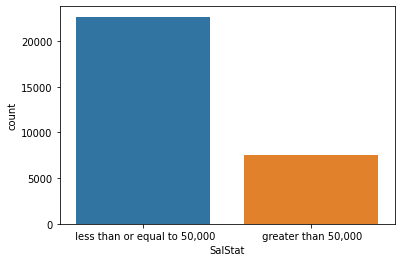

In [ ]:
#Frequency Distribution of SalSats
sns.countplot(data2['SalStat'])

In [ ]:
data2['SalStat'].value_counts()

 less than or equal to 50,000    22654
 greater than 50,000              7508
Name: SalStat, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


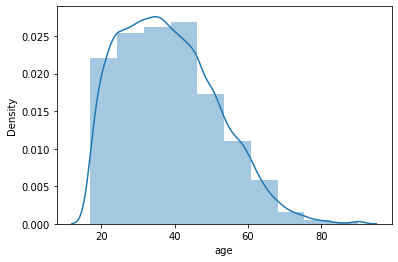

In [ ]:
#Histogram of Age
sns.distplot(data2['age'],bins=10,kde=True)

#People are in the age of 18-45

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


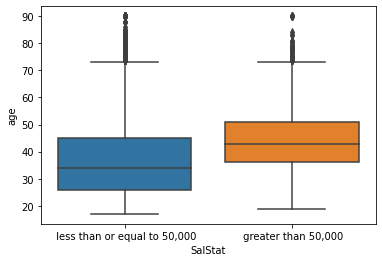

In [ ]:
#Box Plot: Age vs Salary status
sns.boxplot('SalStat','age',data=data2)

#People with age of 35-50 getting >50k
#People with age of 25-35 getting <=50k

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


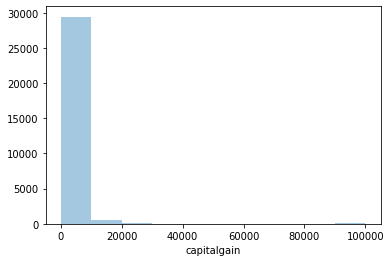

In [ ]:
#Gain dispolot
sns.distplot(data2['capitalgain'],bins=10,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


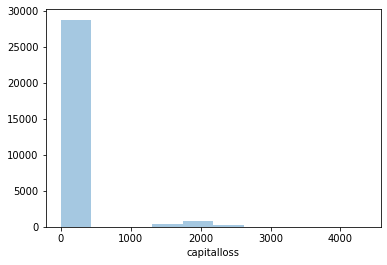

In [ ]:
#capital loss distplot
sns.distplot(data2['capitalloss'],bins=10,kde=False)

In [ ]:
#Reindexing of labels in target
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data2['SalStat']

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64

In [ ]:
newdata=pd.get_dummies(data2,drop_first=True)

In [ ]:
newdata.columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat',
       'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc',
       'JobType_ Self-emp-not-inc', 'JobType_ State-gov',
       'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th',
       'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th',
       'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors',
       'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters',
       'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college',
       'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation

In [ ]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 95 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        30162 non-null  int64
 1   capitalgain                                30162 non-null  int64
 2   capitalloss                                30162 non-null  int64
 3   hoursperweek                               30162 non-null  int64
 4   SalStat                                    30162 non-null  int64
 5   JobType_ Local-gov                         30162 non-null  uint8
 6   JobType_ Private                           30162 non-null  uint8
 7   JobType_ Self-emp-inc                      30162 non-null  uint8
 8   JobType_ Self-emp-not-inc                  30162 non-null  uint8
 9   JobType_ State-gov                         30162 non-null  uint8
 10  JobType_ Without-pay                       301

In [ ]:
#Seprating Features and Target variable
y=newdata['SalStat']
x=newdata.drop(columns='SalStat')

In [ ]:
y.values

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
x.values

array([[45,  0,  0, ...,  1,  0,  0],
       [24,  0,  0, ...,  1,  0,  0],
       [44,  0,  0, ...,  1,  0,  0],
       ...,
       [23,  0,  0, ...,  1,  0,  0],
       [42,  0,  0, ...,  1,  0,  0],
       [29,  0,  0, ...,  1,  0,  0]])

In [ ]:
#Importing the sklearn library for modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#Splitting the data into training and testing
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
#Make an instance of the model
clf=LogisticRegression()

In [ ]:
#Fitting the training data into the model
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Prediction on test data
y_pred=clf.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Calculating the accuracy
accuracy=accuracy_score(y_test,y_pred)

In [ ]:
accuracy*100

84.39606586363134

In [ ]:
misclassification=(y_test!=y_pred).sum()

In [ ]:
misclassification

1412

In [ ]:
y_test.count()

9049

In [ ]:
Misclassification_percent=1412/9049
Misclassification_percent


0.1560393413636866